In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [4]:
len(words)

32033

In [13]:
# Build the vocabulary of characters and mappings to/from integers.
chars = sorted(list(set(''.join(words))))
stoi = {ch: ix + 1 for ix, ch in enumerate(chars)}
stoi['.'] = 0
itos = {ix: ch for ch, ix in stoi.items()}

In [176]:
# Basically what i have to build now is inputs and targets
# ['a', 'm', 'i'] ---> 'l'
# ['m', 'i', 'l'] ---> 'y'
X = []
Y = []
context_size = 3  # how many characters are considered while predicting the next one
for word in words:
    context = [0] * context_size
    for ch in word + '.':
        X.append(context)
        Y.append(stoi[ch])
        # print(f'{"".join([itos[i] for i in context])} ---> {ch}')
        context = context[1:] + [stoi[ch]]
X = torch.tensor(X)
Y = torch.tensor(Y)

In [177]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [258]:
g = torch.Generator().manual_seed(13)
C = torch.randn(size=[27, 2])
W1 = torch.randn([6, 100], generator=g)
b1 = torch.randn([100], generator=g)
W2 = torch.randn([100, 27], generator=g)
b2 = torch.randn([27], generator=g)
parameters = [C, W1, b1, W2, b2]

In [259]:
sum(p.nelement() for p in parameters)

3481

In [260]:
for p in parameters:
    p.requires_grad = True

In [261]:
lre = torch.linspace(-3, 0, steps=1000)
lrs = 10 ** lre

In [304]:
lri = []
lossi = []

for i in range(10000):
    # Mini-batch construct
    ix = torch.randint(0, X.shape[0], (32,))
    # Forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    # print(loss. item())
    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # Update
    # lr = lrs[i]
    for p in parameters:
        p.data += -0.001 * p.grad
    # Track stats
    # lri.append(lre[i])
    # lossi.append(loss.item())

In [305]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss

tensor(2.2265, grad_fn=<NllLossBackward0>)

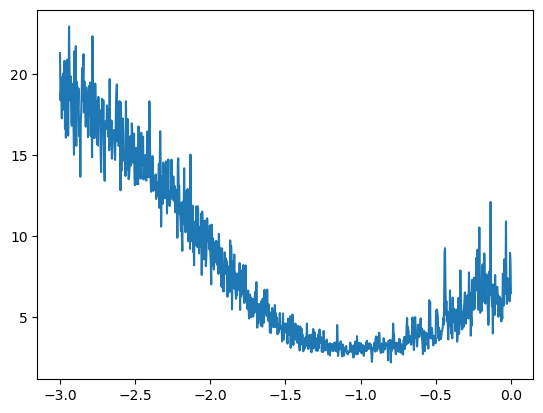

In [244]:
plt.plot(lri, lossi)

In [249]:
# So randomly guessed 10**-1.0 = 0.1 learning rate seems to be a sweets spot